# 📱 Mobile Performance Prediction using Machine Learning

## Introduction
Smartphones today vary widely in performance due to differences in hardware specifications such as CPU, GPU, RAM, and more. Benchmark scores offer a standardized way to evaluate overall device performance, but not all devices have readily available benchmark data.

This project aims to predict the **Total Benchmark Score** of a mobile phone based on its hardware specifications using machine learning techniques.

We'll go through data cleaning, preprocessing, modeling, and evaluation to build a predictive system.


## Problem Statement

Given a dataset containing smartphone specifications (such as RAM, storage, chipset, GPU, CPU scores, etc.), the objective is to build a **regression model** that can accurately predict the **Total Benchmark Score** of a phone.

This can be useful for:
- Estimating performance of unreleased devices.
- Comparing phones based on predicted performance.
- Filling missing benchmark scores in datasets.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('mobile_dataset.csv')

In [5]:
df.head()

,Phone Name,Chipset,GPU,RAM (GB),Storage (GB),Release Year,CPU Score,GPU Score,MEM Score,UX Score,Total Score
0,iQOO 13,Snapdragon 8 Elite,Adreno 830,16,512,2025,586291,1183870,492574,432974,2695709
1,Red Magic 10 Pro,Snapdragon 8 Elite,Adreno 830,12,256,2025,593626,1193547,476871,387160,2651204
2,Mi 15 Ultra,Snapdragon 8 Elite,Adreno 830,16,512,2025,542576,1036853,474641,423893,2477963
3,vivo X200 Pro,MediaTek Dimensity 9400,Mali-G720,12,256,2025,580620,1089373,394090,412650,2476733
4,Mi 15,Snapdragon 8 Elite,Adreno 830,12,512,2025,550938,1038053,446477,359902,2395370


In [6]:
df.describe()

,RAM (GB),Storage (GB),Release Year,CPU Score,GPU Score,MEM Score,UX Score,Total Score
count,658.000000,658.000000,658.000000,658.000000,6.580000e+02,658.000000,658.000000,6.580000e+02
mean,9.937690,259.744681,2022.512158,501342.401216,8.540142e+05,468746.480243,466375.542553,2.447204e+06
std,3.698789,165.577028,2.296978,122370.068334,1.753199e+05,103188.977277,153831.969575,4.405930e+05
min,2.000000,32.000000,2018.000000,190000.000000,3.500000e+05,160000.000000,234651.000000,1.476494e+06
25%,8.000000,128.000000,2020.000000,424246.750000,7.400000e+05,412440.500000,346033.000000,2.113916e+06
50%,12.000000,256.000000,2021.000000,482959.000000,8.650000e+05,460000.000000,380232.500000,2.342677e+06
75%,12.000000,512.000000,2025.000000,570000.000000,1.012084e+06,500000.000000,635000.000000,2.854174e+06
max,24.000000,512.000000,2025.000000,820000.000000,1.193547e+06,760000.000000,784012.000000,3.323500e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phone Name    658 non-null    object
 1   Chipset       658 non-null    object
 2   GPU           658 non-null    object
 3   RAM (GB)      658 non-null    int64 
 4   Storage (GB)  658 non-null    int64 
 5   Release Year  658 non-null    int64 
 6   CPU Score     658 non-null    int64 
 7   GPU Score     658 non-null    int64 
 8   MEM Score     658 non-null    int64 
 9   UX Score      658 non-null    int64 
 10  Total Score   658 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 56.7+ KB


In [10]:
df.shape

(658, 11)

## Dataset Overview

The dataset used contains various smartphone hardware features and a target variable called **Total Score** which represents the overall benchmark result.

### Feature Description:
| Feature        | Description |
|----------------|-------------|
| Phone Name     | Name of the phone model |
| RAM (GB)       | RAM size in gigabytes |
| Storage (GB)   | Internal storage capacity |
| Chipset        | SoC (System on Chip) used |
| GPU            | Graphics Processing Unit |
| CPU Score      | Performance score of the CPU |
| GPU Score      | Performance score of the GPU |
| MEM Score      | Memory performance score |
| UX Score       | User Experience score |
| Total Score    | 🏁 Target variable - overall benchmark score |


## Data Cleaning


### Handle Missing Values

In [12]:
missing_values = df.isnull().sum()
print(missing_values)

Phone Name      0
Chipset         0
GPU             0
RAM (GB)        0
Storage (GB)    0
Release Year    0
CPU Score       0
GPU Score       0
MEM Score       0
UX Score        0
Total Score     0
dtype: int64


### Data Cleaning

In [14]:
duplicates = df.duplicated().sum()
print(duplicates)

5


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
duplicates = df.duplicated().sum()
print(duplicates)

0


In [17]:
print(df.dtypes)

Phone Name      object
Chipset         object
GPU             object
RAM (GB)         int64
Storage (GB)     int64
Release Year     int64
CPU Score        int64
GPU Score        int64
MEM Score        int64
UX Score         int64
Total Score      int64
dtype: object


# Data Preprocessing

## Label Encoding (for Chipset and GPU) and Standardization

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [19]:
label_encoder = LabelEncoder()

In [20]:
df['Chipset'] = label_encoder.fit_transform(df['Chipset'])
df['GPU'] = label_encoder.fit_transform(df['GPU'])

In [26]:
df.head()

,Phone Name,Chipset,GPU,RAM (GB),Storage (GB),Release Year,CPU Score,GPU Score,MEM Score,UX Score,Total Score
0,iQOO 13,86,21,16,512,2025,586291,1183870,492574,432974,2695709
1,Red Magic 10 Pro,86,21,12,256,2025,593626,1193547,476871,387160,2651204
2,Mi 15 Ultra,86,21,16,512,2025,542576,1036853,474641,423893,2477963
3,vivo X200 Pro,40,34,12,256,2025,580620,1089373,394090,412650,2476733
4,Mi 15,86,21,12,512,2025,550938,1038053,446477,359902,2395370


In [27]:
scaler = StandardScaler()

In [28]:
numerical_columns = ['RAM (GB)', 'Storage (GB)', 'CPU Score', 'GPU Score', 'MEM Score', 'UX Score']

In [29]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [30]:
df.head()

,Phone Name,Chipset,GPU,RAM (GB),Storage (GB),Release Year,CPU Score,GPU Score,MEM Score,UX Score,Total Score
0,iQOO 13,86,21,1.634892,1.517199,2025,0.689647,1.887714,0.228625,-0.222251,2695709
1,Red Magic 10 Pro,86,21,0.552972,-0.028102,2025,0.749466,1.942950,0.076843,-0.519748,2651204
2,Mi 15 Ultra,86,21,1.634892,1.517199,2025,0.333135,1.048537,0.055289,-0.281219,2477963
3,vivo X200 Pro,40,34,0.552972,-0.028102,2025,0.643398,1.348322,-0.723302,-0.354226,2476733
4,Mi 15,86,21,0.552972,1.517199,2025,0.401330,1.055387,-0.216939,-0.696750,2395370


## Splitting the Dataset

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = df.drop(columns=['Total Score', 'Phone Name'])
y = df['Total Score']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
print("Train set size:", x_train.shape)
print("Test set size:", x_test.shape)

Train set size: (522, 9)
Test set size: (131, 9)


## Model Building

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [37]:
model.fit(x_train, y_train)

LinearRegression()

## Model Evaluation

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
y_pred = model.predict(x_test)

In [42]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 92437.18044555289
MSE: 17768766613.30615
R²: 0.9153428475084918


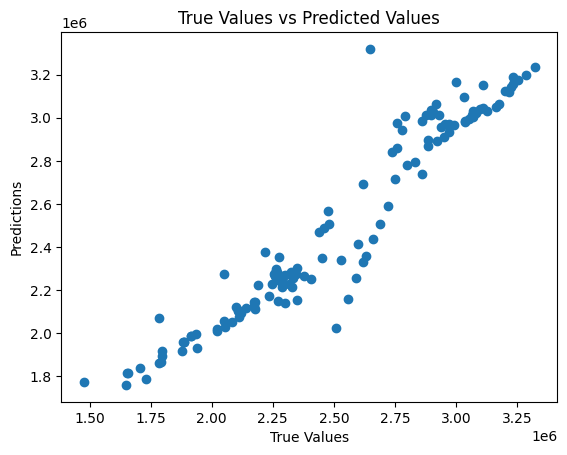

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predicted Values")
plt.show()

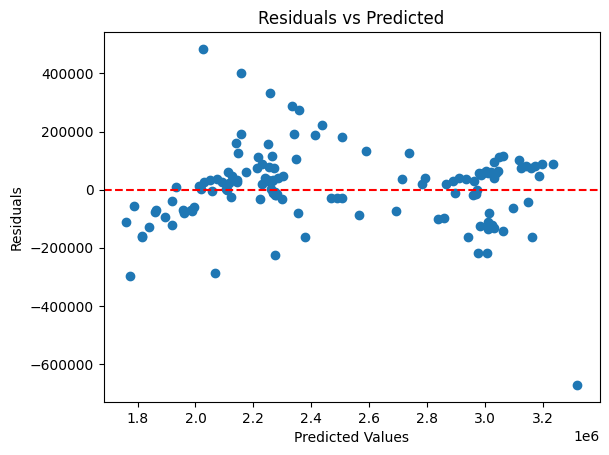

In [55]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

## Cross-Validation

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, , y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE scores: {cross_val_scores}")

Cross-validation MSE scores: [-4.76993459e+10 -6.31156941e+09 -4.90262498e+10 -6.35168558e+09
 -7.17677256e+09]


In [57]:
## Feature Importance (Model Coefficients)

In [58]:
feature_names = x.columns
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef}")

Chipset: 175.52700977748117
GPU: -431.2776167034717
RAM (GB): 8100.009953635273
Storage (GB): -3394.8854714328027
Release Year: 30127.846491974717
CPU Score: 148818.22563663495
GPU Score: 101192.85837538818
MEM Score: -195252.16729824358
UX Score: 398307.1599482298


In [52]:
import joblib
joblib.dump(model, 'mobile_score_predictor.pkl')

['mobile_score_predictor.pkl']

In [53]:
joblib.dump(label_encoder, 'chipset_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Conclusion

- The Linear Regression model achieved an R² score of approximately **91%**, indicating [quality].
- The most important features influencing the benchmark score were **CPU Score**, **GPU Score**, etc.
- The model performs reasonably well for a baseline; however, more complex models (Random Forest, XGBoost) could be tested in the future for better performance.

### Future Improvements
- Try ensemble models
- Add more features like battery, screen size
- Deploy as a web service using Streamlit or Flask
